In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## ETTh1 Dataset Overview

**ETTh1** stands for **Electricity Transformer Temperature (hourly)** — collected from a region in China.  

- **GitHub / Source:** [nixtlaverse.nixtla.io](https://nixtlaverse.nixtla.io)  

According to the repository README, the dataset includes **two years of data, hourly**, with columns:  


- `OT` is the **target variable (oil temperature)**.  

Many forecasting papers treat **ETTh1** as a benchmark for **long-sequence time series forecasting**.  

- **Reference:** NeurIPS Proceedings

- **GitHub / Source**: [ETDataset – zh￼•￼ouhaoyi/ETDataset](https://github.com/zhouhaoyi/ETDataset) :contentReference[oaicite:1]{index=1}



where `OT` is the **target variable (oil temperature)**. :contentReference[oaicite:3]{index=3}

Many forecasting papers treat ETTh1 as a benchmark for **long‑sequence time‑series forecasting (LSTF)**. :contentReference[oaicite:4]{index=4}

### 📚 Selected Papers / Models using ETTh1
Here are a few notable studies that use the ETTh1 dataset:
- Informer: Beyond Efficient Transformer for Long Sequence Time-Series Forecasting (Zhou et al., 2021) — introduced the dataset in the context of long sequence forecasting. :contentReference[oaicite:6]{index=6}  
- Autoformer: Decomposition Transformers with Auto‑Correlation for Long‑Term Series Forecasting (Wu et al., 2021) — uses ETTh1 among other benchmarks. :contentReference[oaicite:8]{index=8}  
- ETSformer: Exponential Smoothing Transformers for Time‑series Forecasting (Woo et al., 2022) — also uses ETTh1 as one of the benchmark datasets. :contentReference[oaicite:10]{index=10}  

---

### ✅ Usage Notes for Your Paper
- When referencing, cite the GitHub repository and the explanatory dataset page (e.g., PapersWithCode or the original paper) so reviewers can trace the dataset provenance.  
- If you include results with ETTh1, mention clearly the split (e.g., 12 months train / 4 months val / 4 months test) as reported in the dataset description. :contentReference[oaicite:11]{index=11}  
- Because this dataset is widely used in “long‑sequence” forecasting research, using it strengthens your work’s comparability with prior literature.




In [7]:
# Define save path (expand ~ to full home directory)
save_dir = os.path.expanduser("~/Project/AttnLstm/data/raw")
os.makedirs(save_dir, exist_ok=True)

# Full file path
file_path = os.path.join(save_dir, "ETTh1.csv")

# Download once and save locally
# a popular standard dataset used in many top-tier papers is ETTh1 (hourly energy data).



url = "https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv"

if not os.path.exists(file_path):
    df = pd.read_csv(url)
    df.to_csv(file_path, index=False)
    print(f"Dataset saved to {file_path}")
else:
    print(f"Dataset already exists at {file_path}")

# Load it whenever needed
df = pd.read_csv(file_path)
print(df.head())


Dataset saved to /home/mehdi/Project/AttnLstm/data/raw/ETTh1.csv
                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000


In [17]:
df = pd.read_csv(file_path)
df.size
print(df.head())
df.columns = df.columns.str.strip().str.replace('\ufeff', '')
print(df.columns)

# Ensure datetime type
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select target
target = df['OT'].values

                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000


139360

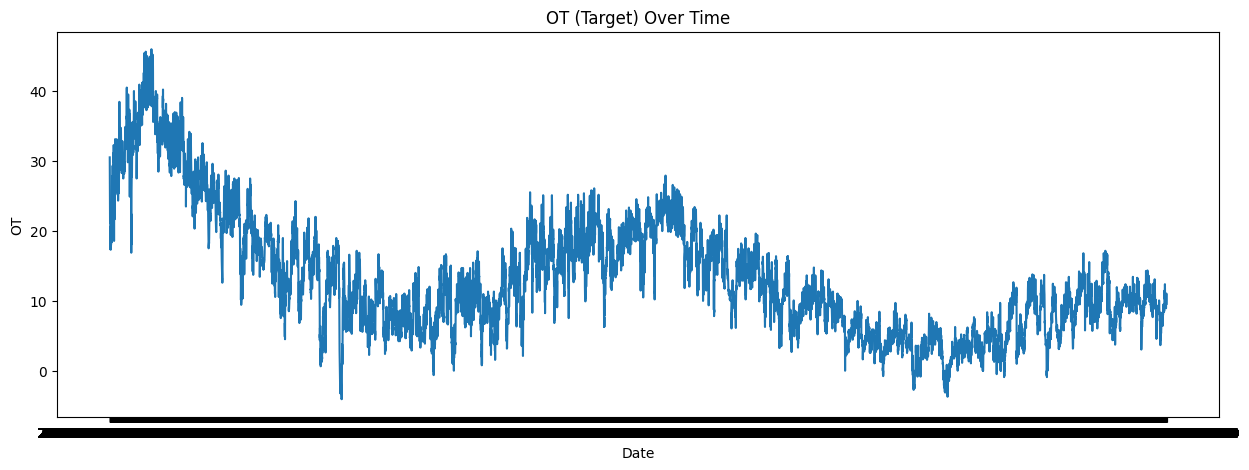

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='OT', data=df)
plt.title("OT (Target) Over Time")
plt.xlabel("Date")
plt.ylabel("OT")
plt.show()

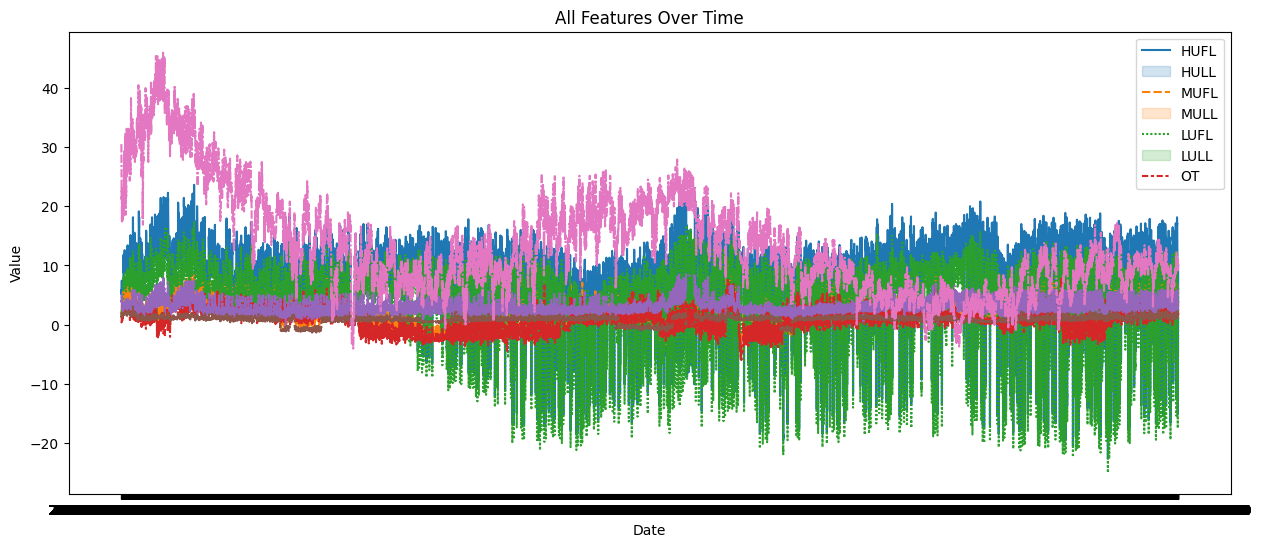

In [13]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df.set_index('date'))
plt.title("All Features Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(df.columns[1:])
plt.show()

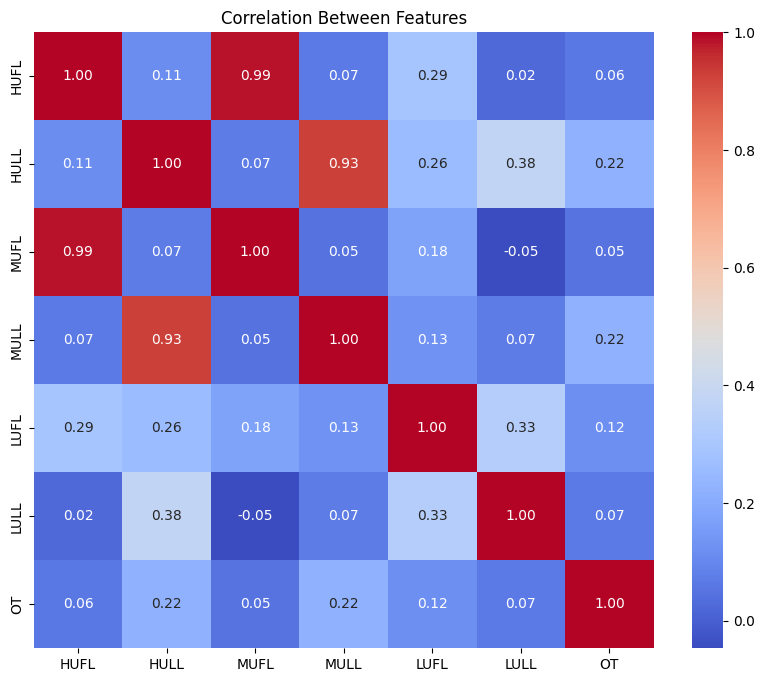

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['date']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

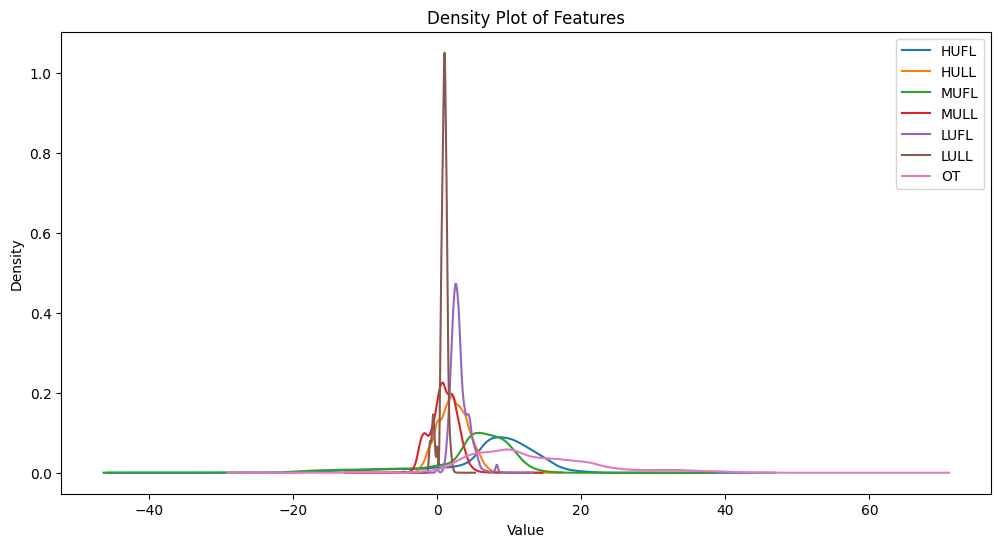

In [15]:
df_features = df.drop(columns=['date'])
df_features.plot(kind='density', figsize=(12,6))
plt.title("Density Plot of Features")
plt.xlabel("Value")
plt.show()

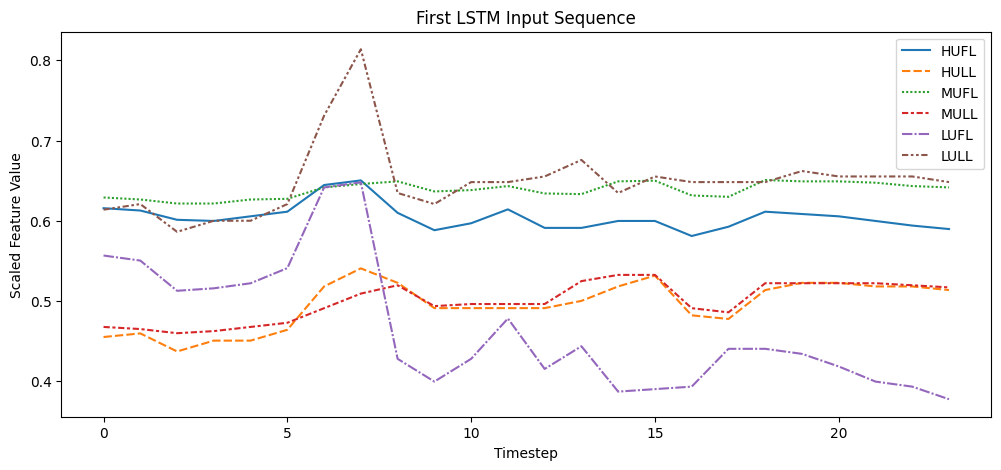

In [16]:
# Example: first sequence
seq_example = X[0]  # shape: (seq_len, num_features-1)
seq_df = pd.DataFrame(seq_example, columns=df.columns[1:-1])
seq_df['timestep'] = range(seq_df.shape[0])

plt.figure(figsize=(12,5))
sns.lineplot(data=seq_df.set_index('timestep'))
plt.title("First LSTM Input Sequence")
plt.xlabel("Timestep")
plt.ylabel("Scaled Feature Value")
plt.show()
